# Support vector regressor implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Creating synthetic dataset

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 1000, n_features = 2, n_targets = 1, noise = 3.0)

In [3]:
X

array([[ 1.3465153 , -0.02875134],
       [-2.33457243,  1.12720974],
       [ 0.1627039 ,  1.37043937],
       ...,
       [ 0.92606828, -1.64645286],
       [ 2.02708064,  0.36932995],
       [ 0.39222659,  0.04180783]])

In [4]:
y

array([ 4.31187059e+00,  3.03732553e+01,  5.10398361e+01, -1.42537995e+01,
        2.70264773e+01, -4.87968950e+01, -7.37924151e+01, -1.43044841e+01,
       -5.98314435e+01,  1.88434418e+01,  1.12678397e+00, -2.07729027e+01,
       -6.99319082e+00, -1.43677033e+01, -5.86386140e+01,  4.70020057e+01,
       -4.98854070e+01, -2.04787330e+01,  4.98767148e+01,  4.18939372e+00,
        1.21315223e+00, -1.79595548e+01,  2.76257881e+01, -2.89968177e+01,
        3.01291853e+01,  5.03554640e+00, -7.29559525e+00, -1.20896407e+01,
        2.52433544e+01,  8.47721578e+01,  1.64893204e+01, -4.11857197e+01,
        8.90659911e+00,  2.84141160e+01,  7.30323647e+00,  3.15830107e+01,
        6.15383413e+01,  6.97342517e+00, -2.50907990e+01,  1.27389081e+01,
        4.38933206e+01, -2.67864140e+01,  2.53043927e+01, -1.64026479e+01,
        4.26989808e+01, -4.78599942e+01, -6.14503318e+01, -3.14962826e+01,
        1.74657566e+01,  8.35459064e+00,  6.27423439e+01, -6.08487595e+01,
        3.15099026e+00, -

In [5]:
pd.DataFrame(X)[0]

0      1.346515
1     -2.334572
2      0.162704
3      0.624992
4     -0.827798
         ...   
995    1.178957
996    0.579109
997    0.926068
998    2.027081
999    0.392227
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

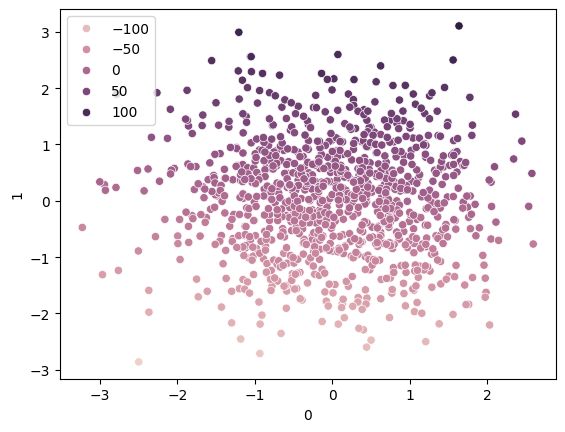

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [10]:
svr.coef_

array([[ 4.53535718, 39.29019861]])

In [11]:
## Prediction
y_pred=svr.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9946386334812691


# Hyper parameter tuning

In [12]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [13]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [14]:
grid.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [15]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9948830209571389
